# Imports libraries

In [1]:
import pandas as pd
import datetime as dt
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)

import sys
sys.path.append("../src")
from data import preprocess_data
from features import build_features
from visualization import visualize

import warnings
warnings.filterwarnings("ignore")

# Metadata for iot_temp.csv

In [2]:
#Metadata for iot_temp.csv

lst = [['id', 'unique IDs for each reading']
, ['room_id', 'room id in which device was installed']
, ['noted_date', 'date and time of reading']
, ['temp', 'temperature readings']
, ['out_or_in', 'whether reading was taken from device installed inside or outside of room']]

pd.set_option('display.max_colwidth', -1)
pd.DataFrame(lst, columns =['Column', 'Info'])

,Column,Info
0,id,unique IDs for each reading
1,room_id,room id in which device was installed
2,noted_date,date and time of reading
3,temp,temperature readings
4,out_or_in,whether reading was taken from device installed inside or outside of room


# Initial EDA

## Import Data

In [3]:
df = pd.read_csv('../data/raw/iot_temp.csv', sep=',', encoding='utf-8')

## Inspect Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          97606 non-null  object
 1   room_id/id  97606 non-null  object
 2   noted_date  97606 non-null  object
 3   temp        97606 non-null  int64 
 4   out/in      97606 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.7+ MB


noted_date need to be specified to datetime.
rename columns to remove '/'

In [5]:
df = df.rename(columns={'room_id/id': 'room_id', 'out/in': 'out_or_in'})

In [6]:
print("No. of features:", df.shape[1])
print("No. of observations:", df.shape[0])

No. of features: 5
No. of observations: 97606


In [7]:
print('No. of unique id:', len(df['id'].unique()))

No. of unique id: 97605


At least one duplicate values exists?

In [8]:
print('No. of unique room id:', len(df['room_id'].unique()))
print('Unique values of room_id:', df['room_id'].unique())

No. of unique room id: 1
Unique values of room_id: ['Room Admin']


No other room exist in this dataset. There maybe other room in the futre so will not be deleitng this column.

In [9]:
print('No. of unique noted date:', len(df['noted_date'].unique()))
print('Date Range:', min(df['noted_date']), '-', max(df['noted_date']))

No. of unique noted date: 27920
Date Range: 01-11-2018 00:06 - 31-10-2018 23:57


Date format to change to show correct date range.

In [10]:
print('Temp Range:', min(df['temp']), '-', max(df['temp']))
print('No. of unique Temp:', len(df['temp'].unique()))
print('Unique values of Temp:', sorted(df['temp'].unique().tolist()))

Temp Range: 21 - 51
No. of unique Temp: 31
Unique values of Temp: [21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]


In [11]:
print('No. of unique temp:', len(df['out_or_in'].unique()))
print('Unique values of out or in:', df['out_or_in'].unique())

No. of unique temp: 2
Unique values of out or in: ['In' 'Out']


In [12]:
df[df.duplicated()]

,id,room_id,noted_date,temp,out_or_in
11,__export__.temp_log_196108_4a983c7e,Room Admin,08-12-2018 09:25,42,Out


In [13]:
duplicated_id = df[df.duplicated()]['id'].tolist()
df[df['id'].isin(duplicated_id)]

,id,room_id,noted_date,temp,out_or_in
10,__export__.temp_log_196108_4a983c7e,Room Admin,08-12-2018 09:25,42,Out
11,__export__.temp_log_196108_4a983c7e,Room Admin,08-12-2018 09:25,42,Out


To remove deplicate values.

## Remove Duplicate

In [14]:
df = preprocess_data.deduplicate(df)
df = preprocess_data.sort_data(df, 'noted_date')
df

,id,room_id,noted_date,temp,out_or_in
16218,__export__.temp_log_126924_cb744837,Room Admin,01-11-2018 00:06,32,In
16217,__export__.temp_log_146101_e61c18d4,Room Admin,01-11-2018 00:07,40,Out
16216,__export__.temp_log_111262_7b3ed086,Room Admin,01-11-2018 00:09,39,Out
16215,__export__.temp_log_147650_344507e9,Room Admin,01-11-2018 00:13,40,Out
16214,__export__.temp_log_139505_cd77d7f9,Room Admin,01-11-2018 00:23,40,Out
...,...,...,...,...,...
16223,__export__.temp_log_119348_c6513205,Room Admin,31-10-2018 23:52,40,Out
16222,__export__.temp_log_96071_10974210,Room Admin,31-10-2018 23:53,39,Out
16221,__export__.temp_log_135979_3f77e78b,Room Admin,31-10-2018 23:54,32,In
16220,__export__.temp_log_125166_18e85606,Room Admin,31-10-2018 23:55,40,Out


## Create date freatures

In [15]:
build_features.get_datetime_features(df, 'noted_date')

In [16]:
df.transpose()

,16218,16217,16216,16215,16214,16213,16212,16211,16210,16209,...,16228,16227,16226,16225,16224,16223,16222,16221,16220,16219
id,__export__.temp_log_126924_cb744837,__export__.temp_log_146101_e61c18d4,__export__.temp_log_111262_7b3ed086,__export__.temp_log_147650_344507e9,__export__.temp_log_139505_cd77d7f9,__export__.temp_log_127981_32c85db7,__export__.temp_log_139627_fd18cfff,__export__.temp_log_129490_87ad9555,__export__.temp_log_132487_2d78b984,__export__.temp_log_141401_b33d14f3,...,__export__.temp_log_142972_2fbbb21a,__export__.temp_log_123161_4d48d4a6,__export__.temp_log_114904_2f7dae97,__export__.temp_log_120293_372d0c5e,__export__.temp_log_96101_bcedb5f4,__export__.temp_log_119348_c6513205,__export__.temp_log_96071_10974210,__export__.temp_log_135979_3f77e78b,__export__.temp_log_125166_18e85606,__export__.temp_log_111124_1e903a64
room_id,Room Admin,Room Admin,Room Admin,Room Admin,Room Admin,Room Admin,Room Admin,Room Admin,Room Admin,Room Admin,...,Room Admin,Room Admin,Room Admin,Room Admin,Room Admin,Room Admin,Room Admin,Room Admin,Room Admin,Room Admin
noted_date,2018-01-11 00:06:00,2018-01-11 00:07:00,2018-01-11 00:09:00,2018-01-11 00:13:00,2018-01-11 00:23:00,2018-01-11 00:25:00,2018-01-11 00:31:00,2018-01-11 00:33:00,2018-01-11 00:37:00,2018-01-11 00:41:00,...,2018-10-31 23:32:00,2018-10-31 23:37:00,2018-10-31 23:45:00,2018-10-31 23:47:00,2018-10-31 23:50:00,2018-10-31 23:52:00,2018-10-31 23:53:00,2018-10-31 23:54:00,2018-10-31 23:55:00,2018-10-31 23:57:00
temp,32,40,39,40,40,40,41,40,39,41,...,40,39,39,39,32,40,39,32,40,39
out_or_in,In,Out,Out,Out,Out,Out,Out,Out,Out,Out,...,Out,Out,Out,Out,In,Out,Out,In,Out,Out
date,2018-01-11,2018-01-11,2018-01-11,2018-01-11,2018-01-11,2018-01-11,2018-01-11,2018-01-11,2018-01-11,2018-01-11,...,2018-10-31,2018-10-31,2018-10-31,2018-10-31,2018-10-31,2018-10-31,2018-10-31,2018-10-31,2018-10-31,2018-10-31
year,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,...,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018
month,1,1,1,1,1,1,1,1,1,1,...,10,10,10,10,10,10,10,10,10,10
month_name,January,January,January,January,January,January,January,January,January,January,...,October,October,October,October,October,October,October,October,October,October
day,11,11,11,11,11,11,11,11,11,11,...,31,31,31,31,31,31,31,31,31,31


## Inspection of data after creation of date features

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97605 entries, 16218 to 16219
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                97605 non-null  object        
 1   room_id           97605 non-null  object        
 2   noted_date        97605 non-null  datetime64[ns]
 3   temp              97605 non-null  int64         
 4   out_or_in         97605 non-null  object        
 5   date              97605 non-null  object        
 6   year              97605 non-null  int64         
 7   month             97605 non-null  int64         
 8   month_name        97605 non-null  object        
 9   day               97605 non-null  int64         
 10  week              97605 non-null  int32         
 11  day_of_week       97605 non-null  int64         
 12  day_of_week_name  97605 non-null  object        
 13  is_weekend        97605 non-null  int32         
 14  time              

In [18]:
print('No. of unique date:', len(df['date'].unique()))
print('Date Range:', min(df['date']), '-', max(df['date']))

No. of unique date: 86
Date Range: 2018-01-11 - 2018-12-10


Not every day temperature is recorded. Will this affect analysis?

In [19]:
print('No. of unique year:', len(df['year'].unique()))
print('Unique values of year:', df['year'].unique())

No. of unique year: 1
Unique values of year: [2018]


In [20]:
print('No. of unique month:', len(df['month'].unique()))
print('Unique values of month:', df['month'].unique())

No. of unique month: 12
Unique values of month: [ 1  2  3  4  5  6  7  8  9 10 11 12]


In [21]:
print('No. of unique month name:', len(df['month_name'].unique()))
print('Unique values of monthname:', df['month_name'].unique())

No. of unique month name: 12
Unique values of monthname: ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']


In [22]:
day = df['day'].unique()
day.sort()
print('No. of unique day:', len(day))
print('Unique values of day:', day)

No. of unique day: 24
Unique values of day: [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]


1st to 7th of every month is not recorded. 1st week or 7 days of every month room is not used?

In [23]:
week = df['week'].unique()
week.sort()
print('No. of unique week:', len(week))
print('Unique values week:', week)

No. of unique week: 30
Unique values week: [ 2  6  7 10 11 15 19 23 24 28 30 31 32 33 34 35 36 37 38 39 41 42 43 44
 45 46 47 48 49 50]


In [24]:
day_of_week = df['day_of_week'].unique()
day_of_week.sort()
print('No. of unique day of week:', len(day_of_week))
print('Unique values of day of week:', day_of_week)

No. of unique day of week: 7
Unique values of day of week: [1 2 3 4 5 6 7]


Defualt pandas weekofday function returns 0 to 6, Monday to Sunday, added 1 on every day of week to so it is easier to see and understand week of day.

In [25]:
print('No. of unique day of week name:', len(df['day_of_week_name'].unique()))
print('Unique values of day of week name:', df['day_of_week_name'].unique())

No. of unique day of week name: 7
Unique values of day of week name: ['Thursday' 'Friday' 'Sunday' 'Monday' 'Wednesday' 'Saturday' 'Tuesday']


In [26]:
print('No. of unique is weekend:', len(df['is_weekend'].unique()))
print('Unique values of is weekend:', df['is_weekend'].unique())

No. of unique is weekend: 2
Unique values of is weekend: [1 0]


In [27]:
time = df['time'].unique()
time.sort()
print('No. of unique time:', len(time))
print('Unique values of day of time:', time)

No. of unique time: 1440
Unique values of day of time: [datetime.time(0, 0) datetime.time(0, 1) datetime.time(0, 2) ...
 datetime.time(23, 57) datetime.time(23, 58) datetime.time(23, 59)]


In [28]:
hour = df['hour'].unique()
hour.sort()
print('No. of unique hour:', len(hour))
print('Unique values of hour:', hour)

No. of unique hour: 24
Unique values of hour: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [29]:
minute = df['minute'].unique()
minute.sort()
print('No. of unique minute:', len(minute))
print('Unique values of minute:', minute)

No. of unique minute: 60
Unique values of minute: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]


In [30]:
second = df['second'].unique()
second.sort()
print('No. of unique second:', len(second))
print('Unique values of second:', second)

No. of unique second: 1
Unique values of second: [0]


Dataset always record at start of minute. Need to verify from data source if this will always be the case to prevent loss of data in the future dataset.

In [31]:
df.groupby(['month', 'out_or_in'])['month'].count()

month  out_or_in
1      In           97   
       Out          1091 
2      In           64   
       Out          1186 
3      In           1368 
       Out          3211 
4      In           1428 
       Out          1906 
5      In           320  
       Out          904  
6      In           1150 
       Out          1826 
7      In           1434 
       Out          747  
8      In           846  
       Out          917  
9      In           3009 
       Out          8883 
10     In           5736 
       Out          38915
11     In           2950 
       Out          13319
12     In           1943 
       Out          4355 
Name: month, dtype: int64

In [32]:
df.groupby(['month'])['month'].count()

month
1     1188 
2     1250 
3     4579 
4     3334 
5     1224 
6     2976 
7     2181 
8     1763 
9     11892
10    44651
11    16269
12    6298 
Name: month, dtype: int64

# Data Visualization

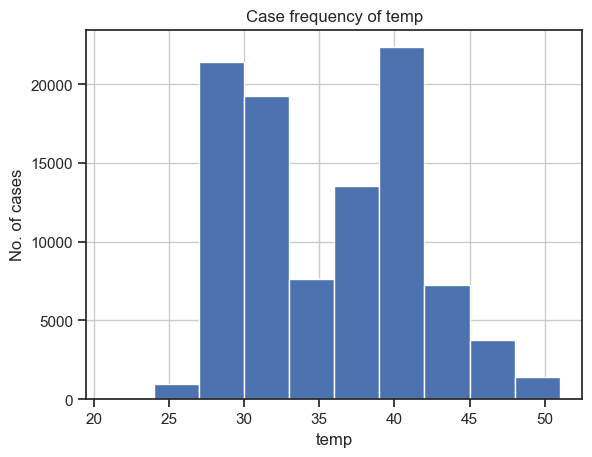

In [33]:
visualize.plot_histogram_custom_bins(df, "temp", 10, "temp", "No. of cases", "Case frequency of temp")

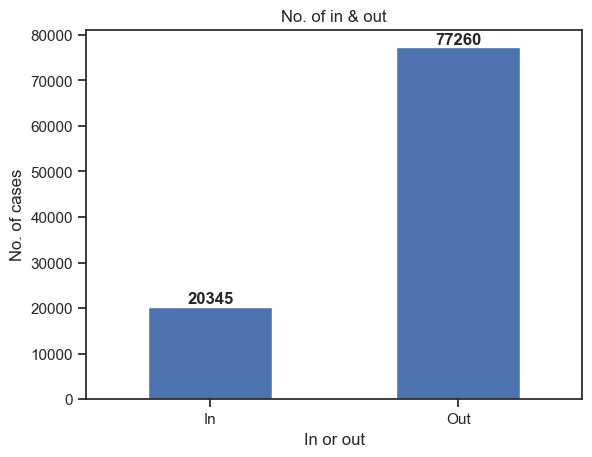

In [34]:
visualize.plot_bar(df, "out_or_in", False, "In or out", "No. of cases", "No. of in & out")

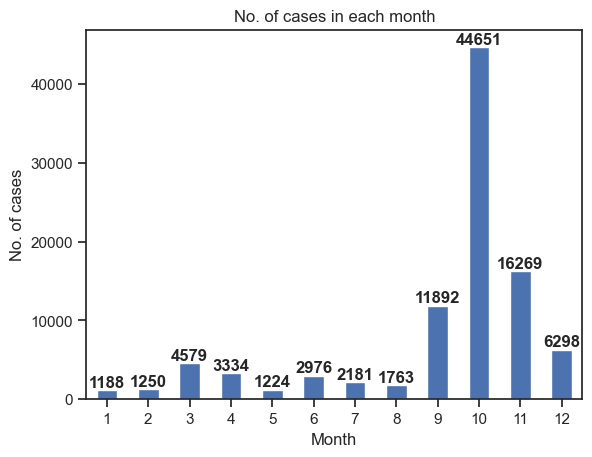

In [35]:
visualize.plot_bar(df, "month", False, "Month", "No. of cases", "No. of cases in each month")

More caes were observed at the last quarter of the year.

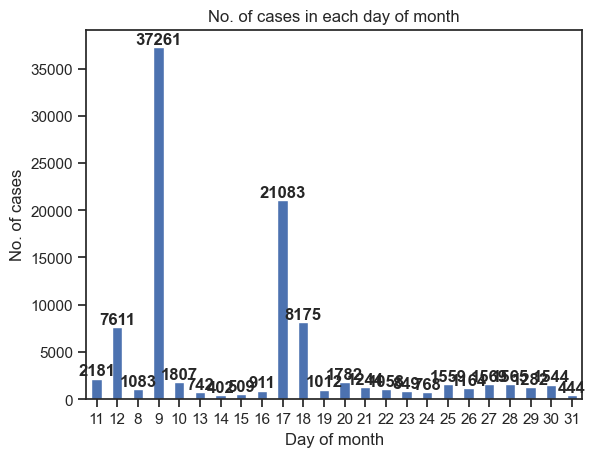

In [36]:
visualize.plot_bar(df, "day", False, "Day of month", "No. of cases", "No. of cases in each day of month")

Significant cases were observed during 9th, 12th 17th and 18th of each month.

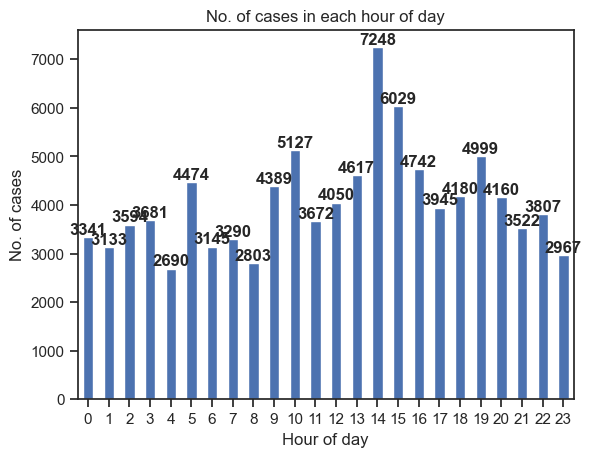

In [37]:
visualize.plot_bar(df, "hour", False, "Hour of day", "No. of cases", "No. of cases in each hour of day")

Seems to have a trend every 3 or 4 hour throughout the day of nujmber of observation rising. This could be a trend or some months has more observations during that hour of day.

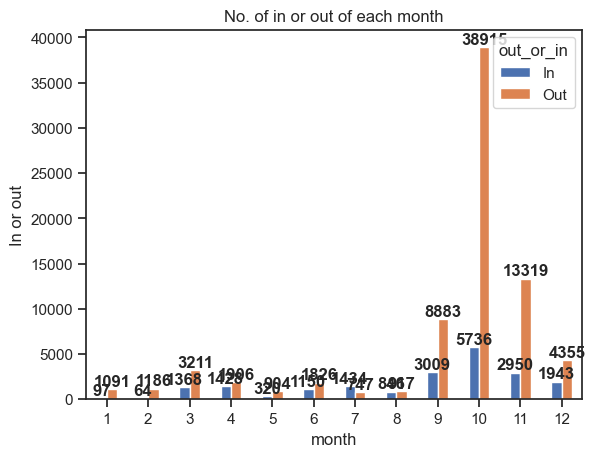

In [38]:
visualize.plot_bar_count_groupby(df, "month", "out_or_in", "out_or_in", "In or out", "No. of in or out of each month")

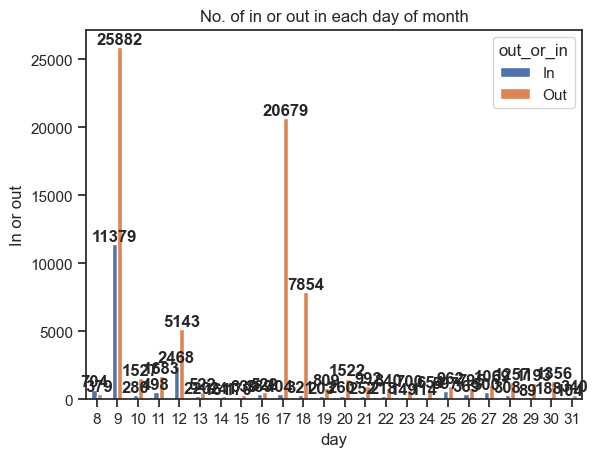

In [39]:
visualize.plot_bar_count_groupby(df, "day", "out_or_in", "out_or_in", "In or out", "No. of in or out in each day of month")

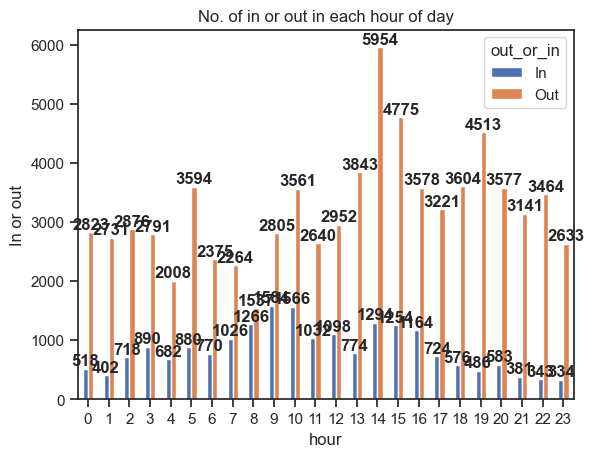

In [40]:
visualize.plot_bar_count_groupby(df, "hour", "out_or_in", "out_or_in", "In or out", "No. of in or out in each hour of day")

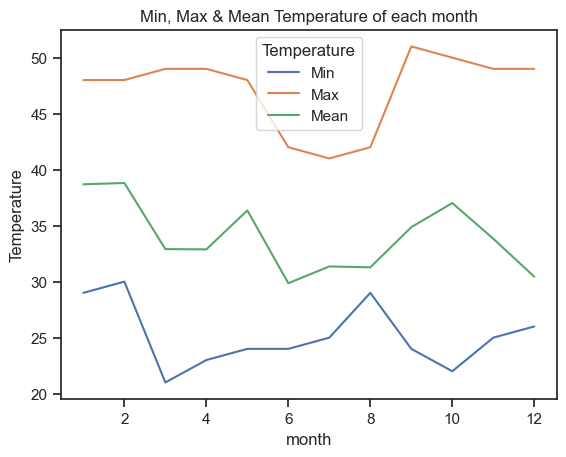

In [41]:
visualize.plot_line_aggregate_temp(df, 'month')

The Min, Max, & Mean has a very similar trend with slight differences on each measurement.

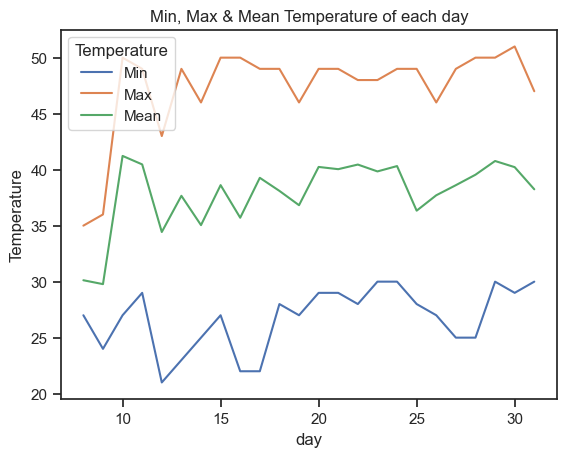

In [42]:
visualize.plot_line_aggregate_temp(df,'day')

The Max & Mean has very similar trend throughout each day of month.

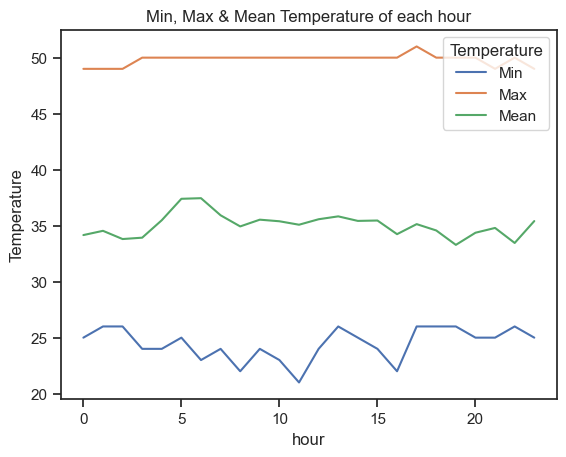

In [43]:
visualize.plot_line_aggregate_temp(df,'hour')

Both Min & Mean fluctuates throuhout the day, while the Max quite a very consistant.

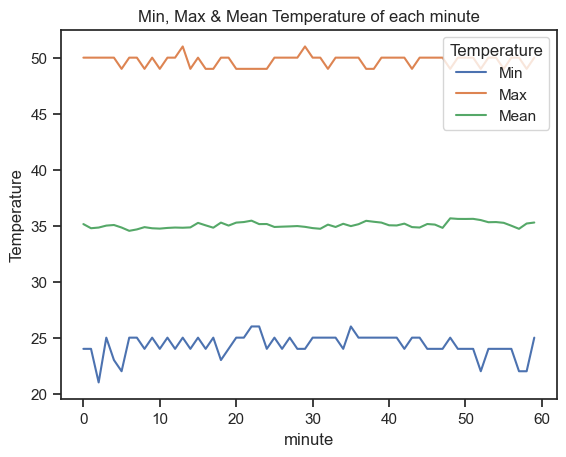

In [44]:
visualize.plot_line_aggregate_temp(df,'minute')

Min and Max temperture fluctuates within 4 to 5 degree calulus while mean seem to have a fairly consistent measurements.

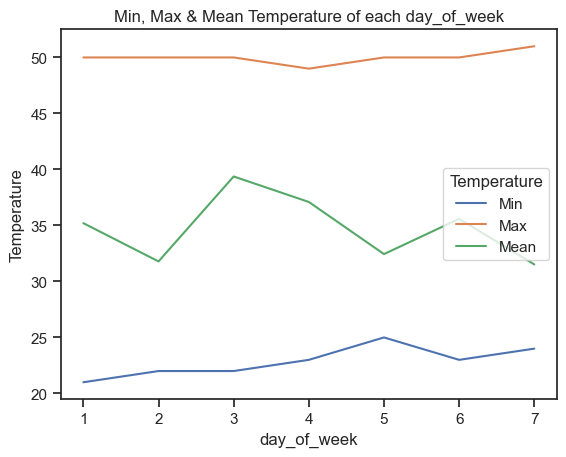

In [45]:
visualize.plot_line_aggregate_temp(df,'day_of_week')

Both Min & Max rises thoughout the week with 1 or 2 days of dips, while mean seems to fluctate.

Look into the month, October, with the most obsersations.


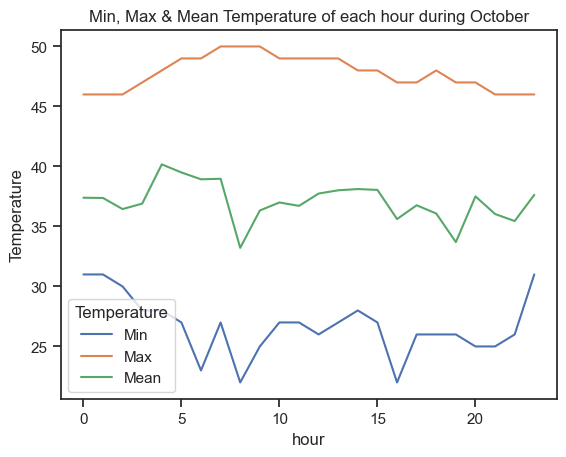

In [46]:
print('Look into the month, October, with the most obsersations.')
visualize.plot_line_temp_filter(df, 'agg', 'month_name', 'October', 'hour')

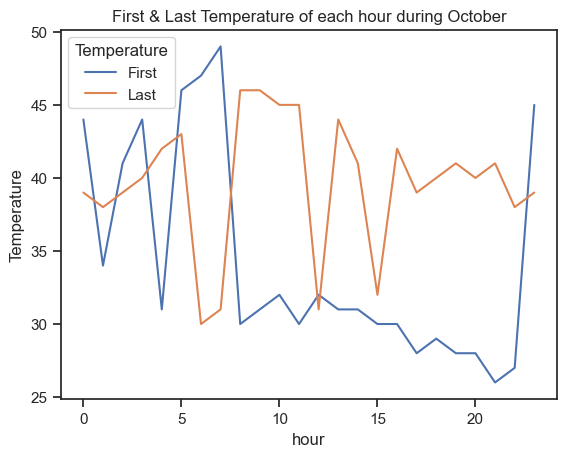

In [47]:
visualize.plot_line_temp_filter(df, 'first_last', 'month_name', 'October', 'hour')